## Logistic Regression
I chose Violent Crime Occurrence as my label to apply Logistic Regression to it where Violent Crime Occurrence has 2 values ‘Yes’ showing that a crime has occurred or ‘No’ showing that there was no crime. Certain features that I chose from the dataset are as follows:
1.	Age from 12 to 21 years
2.	Age from 12 to 29 years
3.	Age from 16 to 24 years
4.	Age from 65 years & up
5.	Per count of individuals unemployed
6.	Per count of males divorced
7.	Urban Population count

The prediction that a violent crime will occur based on the logistic regression model needs to be made by feeding the model appropriate features and I found that the features stated above affect the crime occurrence thoroughly. After, successfully visualizing the data after cleaning it and slicing it, the accuracy of the model comes out to be 78% and the confusion matrix shows that out of the 40 values, 31 are predicted accurately.


In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('crimedata.csv', encoding='latin-1')

FileNotFoundError: ignored

In [0]:
df.head()

,Êcommunityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79


In [0]:
df.shape

(2215, 147)

In [0]:
df.columns

Index(['Êcommunityname', 'state', 'countyCode', 'communityCode', 'fold',
       'population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian',
       ...
       'burglaries', 'burglPerPop', 'larcenies', 'larcPerPop', 'autoTheft',
       'autoTheftPerPop', 'arsons', 'arsonsPerPop', 'ViolentCrimesPerPop',
       'nonViolPerPop'],
      dtype='object', length=147)

In [0]:
df=df.rename(columns = {'Êcommunityname':'Community Name'})

In [0]:
df.head()

,Community Name,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79


In [0]:
df['ViolentCrimesPerPop'].replace('?','0', inplace = True)

In [0]:
df.loc[df['ViolentCrimesPerPop'] == '?']

,Community Name,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop


In [0]:
df.head()

,Community Name,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,0,9988.79


In [0]:
violent_crimes = list(map(float, df.ViolentCrimesPerPop))

In [0]:
violent_crimes

[41.02,
 127.56,
 218.59,
 306.64,
 0.0,
 442.95,
 226.63,
 439.73,
 115.31,
 1544.24,
 722.02,
 2605.96,
 798.39,
 1476.93,
 0.0,
 0.0,
 89.94,
 374.07,
 112.5,
 772.77,
 0.0,
 2097.71,
 644.75,
 145.2,
 560.71,
 204.23,
 347.97,
 894.51,
 1143.9,
 724.95,
 1487.34,
 689.42,
 49.93,
 16.72,
 649.83,
 346.97,
 1770.94,
 609.81,
 559.55,
 205.56,
 512.19,
 734.61,
 0.0,
 919.33,
 682.23,
 131.47,
 794.41,
 420.91,
 0.0,
 0.0,
 92.91,
 1087.25,
 237.45,
 212.87,
 984.96,
 1279.6,
 256.34,
 142.7,
 753.42,
 122.69,
 1849.3,
 566.64,
 0.0,
 51.91,
 94.97,
 422.05,
 452.4,
 407.12,
 1693.42,
 462.24,
 0.0,
 115.14,
 78.65,
 985.03,
 131.68,
 0.0,
 0.0,
 1134.5,
 969.6,
 251.24,
 934.12,
 377.97,
 889.65,
 40.21,
 0.0,
 465.96,
 150.04,
 49.56,
 1812.62,
 129.13,
 1841.38,
 301.31,
 620.53,
 190.84,
 726.59,
 74.56,
 0.0,
 339.96,
 121.02,
 2127.02,
 809.39,
 0.0,
 199.2,
 1527.29,
 85.17,
 727.83,
 781.32,
 367.13,
 155.25,
 1634.34,
 251.23,
 367.33,
 560.56,
 1981.45,
 83.89,
 39.87,
 0.0

In [0]:
violent_crimes_mean = sum(violent_crimes)/len(violent_crimes)

In [0]:
violent_crimes_mean

530.3040045146731

In [0]:
df['mean_violent_crimes'] = violent_crimes_mean

In [0]:
df['violent_crime_occurence'] = np.where(violent_crimes>=df['mean_violent_crimes'], 'yes', 'no')

In [0]:
df.head()

,Community Name,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop,mean_violent_crimes,violent_crime_occurence
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,138,1132.08,16,131.26,2,16.41,41.02,1394.59,530.304005,no
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,376,1598.78,26,110.55,1,4.25,127.56,1955.95,530.304005,no
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,1797,4972.19,136,376.3,22,60.87,218.59,6167.51,530.304005,no
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,716,4142.56,47,271.93,?,?,306.64,?,530.304005,no
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,1060,8490.87,91,728.93,5,40.05,0,9988.79,530.304005,no


## Creation of Violent Crime Occurence Label with Binary Values

In [0]:
df.groupby('violent_crime_occurence').mean()

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,murders,murdPerPop,mean_violent_crimes
violent_crime_occurence,,,,,,,,,,,,,,,,,,,,,
no,5.509979,32689.042670,2.707529,4.716284,90.651535,2.434721,4.499188,14.372340,27.183125,13.781672,...,52.989732,77.301493,88.433861,20.915279,2383.545630,2.755100,0.433827,2.309704,2.775354,530.304005
yes,5.464567,92072.383202,2.706942,18.142375,71.258031,3.119226,14.530604,14.585984,28.525249,14.344055,...,48.771535,77.620039,87.497874,39.823228,3547.116535,3.586522,2.021929,18.166667,11.739829,530.304005


## Data Slicing

In [0]:
df1 = df.iloc[:200]

In [0]:
age12t21 = df1['agePct12t21'].astype(int)

In [0]:
age12t21.max()

35

In [0]:
age12t21.replace('?','0', inplace = True)

## Visualizing Selected Features by plotting their Histograms

<function matplotlib.pyplot.show(*args, **kw)>

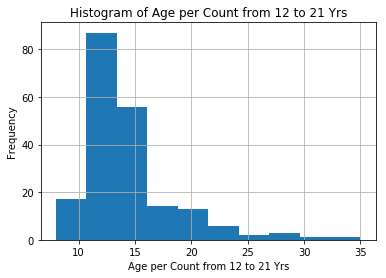

In [0]:
%matplotlib inline
age12t21.hist()
plt.title('Histogram of Age per Count from 12 to 21 Yrs')
plt.xlabel('Age per Count from 12 to 21 Yrs')
plt.ylabel('Frequency')
plt.show

In [0]:
age12t29 = df1['agePct12t29'].astype(int)

In [0]:
age12t29.replace('?','0', inplace = True)

<function matplotlib.pyplot.show(*args, **kw)>

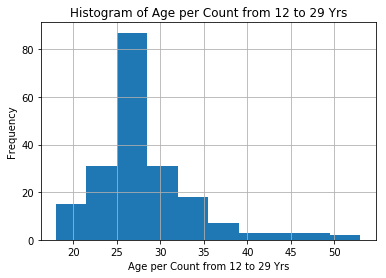

In [0]:
%matplotlib inline
age12t29.hist()
plt.title('Histogram of Age per Count from 12 to 29 Yrs')
plt.xlabel('Age per Count from 12 to 29 Yrs')
plt.ylabel('Frequency')
plt.show

In [0]:
age16t24 = df1['agePct16t24'].astype(int)

In [0]:
age16t24.replace('?','0', inplace = True)

<function matplotlib.pyplot.show(*args, **kw)>

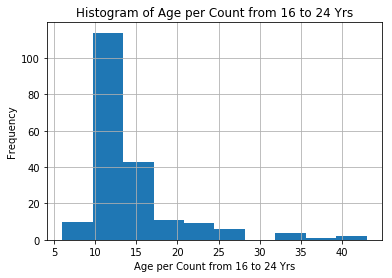

In [0]:
%matplotlib inline
age16t24.hist()
plt.title('Histogram of Age per Count from 16 to 24 Yrs')
plt.xlabel('Age per Count from 16 to 24 Yrs')
plt.ylabel('Frequency')
plt.show

In [0]:
age65up = df1['agePct65up'].astype(int)

In [0]:
age65up.replace('?','0', inplace = True)

<function matplotlib.pyplot.show(*args, **kw)>

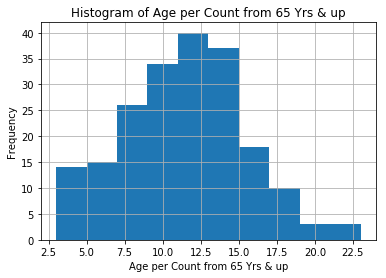

In [0]:
%matplotlib inline
age65up.hist()
plt.title('Histogram of Age per Count from 65 Yrs & up')
plt.xlabel('Age per Count from 65 Yrs & up')
plt.ylabel('Frequency')
plt.show

In [0]:
unemployed = df1['PctUnemployed'].astype(int)

In [0]:
unemployed.replace('?','0', inplace = True)

<function matplotlib.pyplot.show(*args, **kw)>

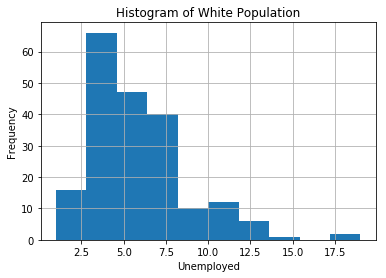

In [0]:
%matplotlib inline
unemployed.hist()
plt.title('Histogram of White Population')
plt.xlabel('Unemployed')
plt.ylabel('Frequency')
plt.show

In [0]:
Murders = df1['murdPerPop'].astype(int)

In [0]:
Murders.replace('?','0', inplace = True)

<function matplotlib.pyplot.show(*args, **kw)>

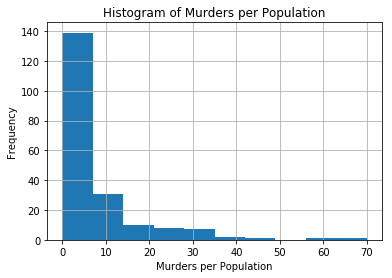

In [0]:
%matplotlib inline
Murders.hist()
plt.title('Histogram of Murders per Population')
plt.xlabel('Murders per Population')
plt.ylabel('Frequency')
plt.show

In [0]:
malesDivorced = df1['MalePctDivorce'].astype(int)

In [0]:
malesDivorced.replace('?','0', inplace = True)

<function matplotlib.pyplot.show(*args, **kw)>

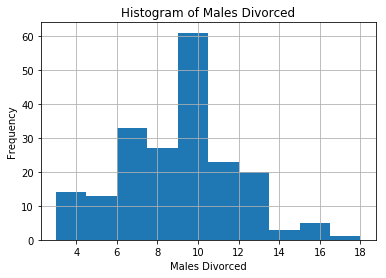

In [0]:
%matplotlib inline
malesDivorced.hist()
plt.title('Histogram of Males Divorced')
plt.xlabel('Males Divorced')
plt.ylabel('Frequency')
plt.show

In [0]:
urbanPop = df1['pctUrban'].astype(int)

In [0]:
urbanPop.replace('?','0', inplace = True)

<function matplotlib.pyplot.show(*args, **kw)>

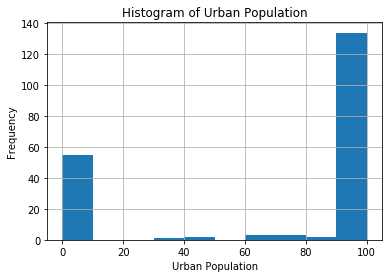

In [0]:
%matplotlib inline
urbanPop.hist()
plt.title('Histogram of Urban Population')
plt.xlabel('Urban Population')
plt.ylabel('Frequency')
plt.show

## Plotting the features to analyze the label and its frequency

<function matplotlib.pyplot.show(*args, **kw)>

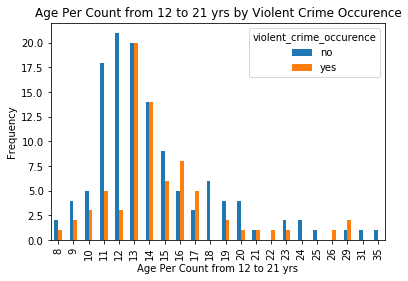

In [0]:
pd.crosstab(age12t21, df1.violent_crime_occurence).plot(kind='bar')
plt.title('Age Per Count from 12 to 21 yrs by Violent Crime Occurence')
plt.xlabel('Age Per Count from 12 to 21 yrs')
plt.xticks(rotation='vertical')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

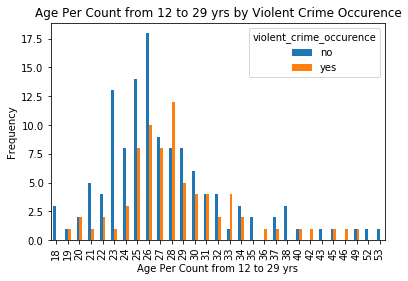

In [0]:
pd.crosstab(age12t29, df1.violent_crime_occurence).plot(kind='bar')
plt.title('Age Per Count from 12 to 29 yrs by Violent Crime Occurence')
plt.xlabel('Age Per Count from 12 to 29 yrs')
plt.xticks(rotation='vertical')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

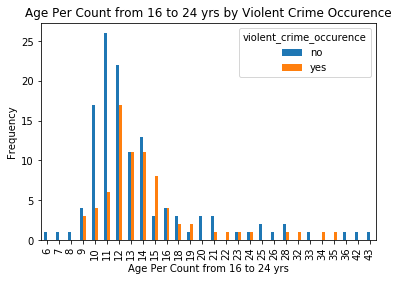

In [0]:
pd.crosstab(age16t24, df1.violent_crime_occurence).plot(kind='bar')
plt.title('Age Per Count from 16 to 24 yrs by Violent Crime Occurence')
plt.xlabel('Age Per Count from 16 to 24 yrs')
plt.xticks(rotation='vertical')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

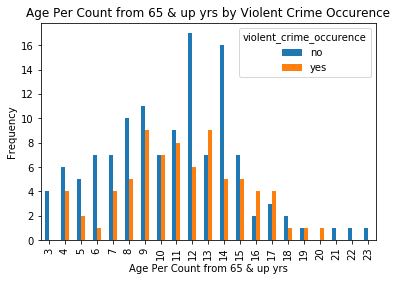

In [0]:
pd.crosstab(age65up, df1.violent_crime_occurence).plot(kind='bar')
plt.title('Age Per Count from 65 & up yrs by Violent Crime Occurence')
plt.xlabel('Age Per Count from 65 & up yrs')
plt.xticks(rotation='vertical')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

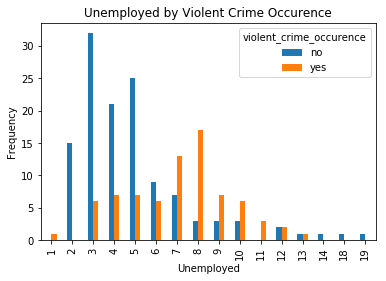

In [0]:
pd.crosstab(unemployed, df1.violent_crime_occurence).plot(kind='bar')
plt.title('Unemployed by Violent Crime Occurence')
plt.xlabel('Unemployed')
plt.xticks(rotation='vertical')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

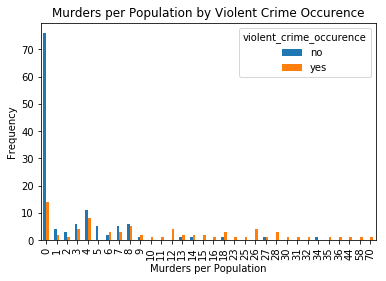

In [0]:
pd.crosstab(Murders, df1.violent_crime_occurence).plot(kind='bar')
plt.title('Murders per Population by Violent Crime Occurence')
plt.xlabel('Murders per Population')
plt.xticks(rotation='vertical')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

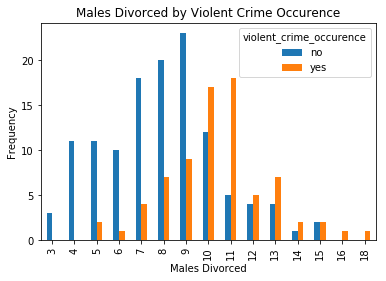

In [0]:
pd.crosstab(malesDivorced, df1.violent_crime_occurence).plot(kind='bar')
plt.title('Males Divorced by Violent Crime Occurence')
plt.xlabel('Males Divorced')
plt.xticks(rotation='vertical')
plt.ylabel('Frequency')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

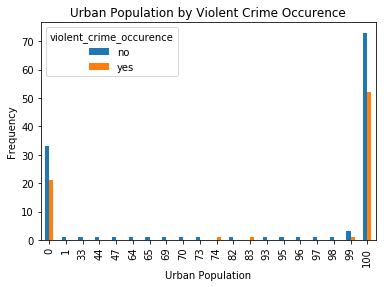

In [0]:
pd.crosstab(urbanPop, df1.violent_crime_occurence).plot(kind='bar')
plt.title('Urban Population by Violent Crime Occurence')
plt.xlabel('Urban Population')
plt.xticks(rotation='vertical')
plt.ylabel('Frequency')
plt.show

In [0]:
X_LogReg= ['agePct12t21','agePct12t29','agePct16t24', 'agePct65up', 'PctUnemployed', 'murdPerPop', 'MalePctDivorce']

In [0]:
y_LogReg = df1[['violent_crime_occurence']]

## Splitting the data

In [0]:
X_train_LogReg, X_test_LogReg, y_train_LogReg, y_test_LogReg = train_test_split(df1[X_LogReg], y_LogReg, test_size=0.2, random_state=0)

## Applying Logistic Regression

In [0]:
logreg = LogisticRegression()
logreg.fit(X_train_LogReg, y_train_LogReg)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
y_pred_LogReg = logreg.predict(X_test_LogReg)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_LogReg, y_test_LogReg)))

Accuracy of logistic regression classifier on test set: 0.78


## Creating the Confusion Matrix to make further conclusion

Model Accuracy for Random Forest: 0.775


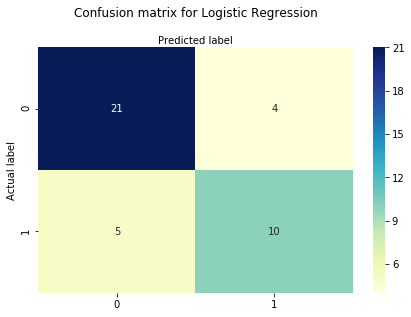

In [0]:
cnf_matrix_LogitRegression = metrics.confusion_matrix(y_test_LogReg, y_pred_LogReg)
cnf_matrix_LogitRegression

class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_LogitRegression), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Logistic Regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Random Forest:",metrics.accuracy_score(y_test_LogReg, y_pred_LogReg))
